# Data Cleaned Readme, Spectograms Display

This notebook contains the information for the data cleaned manually by deleting the files inside the folders and the Spectograms for the files displayed in a grid.

In [1]:
# Importing the libraries 

import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Audio
import librosa.display

### Number of files and Species cleaned 

In [2]:
def get_subfolder_details(parent_folder):
    # List all the items in the parent folder
    items = os.listdir(parent_folder)
    
    # Filter out only the subfolders
    subfolders = [item for item in items if os.path.isdir(os.path.join(parent_folder, item))]
    
    # Get the number of files in each subfolder
    file_counts = []
    for subfolder in subfolders:
        files = [f for f in os.listdir(os.path.join(parent_folder, subfolder)) if os.path.isfile(os.path.join(parent_folder, subfolder, f))]
        file_counts.append(len(files))
    
    # Create a pandas DataFrame
    df = pd.DataFrame({
        'Subfolder': subfolders,
        'Number of Files': file_counts
    })
    
    return df


In [3]:
parent_folder = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species"
df = get_subfolder_details(parent_folder)
print(df)

                 Subfolder  Number of Files
0    Acanthiza chrysorrhoa              211
1        Acanthiza lineata               99
2           Acanthiza nana              337
3        Acanthiza pusilla              730
4     Acanthiza reguloides              165
..                     ...              ...
217          Turdus merula              558
218          Turnix varius              168
219    Uperoleia altissima               90
220       Uperoleia mimula              105
221         Vanellus miles              158

[222 rows x 2 columns]


### Play some of the files in the subfolders

In [4]:
# Specify the path to your folder containing audio files
audio_folder_path = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species"

# Iterate over all files in the folder
for audio_file in os.listdir(audio_folder_path):
    if audio_file.endswith(('.wav', '.mp3')):
        display(Audio(os.path.join(audio_folder_path, audio_file)))

In [5]:
# Defining the Constants

AUDIO_NFFT = 2048
AUDIO_WINDOW = None
AUDIO_STRIDE = 200
AUDIO_SAMPLE_RATE = 48000
AUDIO_MELS = 260
AUDIO_FMIN = 20
AUDIO_FMAX = 13000
AUDIO_TOP_DB = 80

In [6]:
def plot_mel_spectrograms_grid(root_folder, output_dir, grid_size=40):
    # List to store mel spectrograms
    mel_spectrograms = []
    
    # Extract mel spectrograms for all audio files
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".mp3"):
                audio_path = os.path.join(subdir, file)
                y, sr = librosa.load(audio_path)
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr,
                                                    n_mels=AUDIO_MELS, hop_length=AUDIO_STRIDE, fmax=AUDIO_FMAX)
                mel_spectrograms.append(mel_spectrogram)
                if len(mel_spectrograms) == grid_size:  # Stop once we have enough for the grid
                    break
        if len(mel_spectrograms) == grid_size:
            break

    # Create a grid of mel spectrograms
    rows = int(np.sqrt(grid_size))
    cols = int(np.ceil(grid_size / rows))
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(mel_spectrograms):
            mel = mel_spectrograms[i]
            librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), hop_length=128, fmax=8000, ax=ax)
            ax.axis("off")
        else:
            ax.axis("off")
    
    grid_output_path = os.path.join(output_dir, "mel_spectrograms_grid.png")
    plt.tight_layout()
    plt.savefig(grid_output_path, bbox_inches='tight', pad_inches=0)
    plt.show()

## Taeniopygia guttata

In [7]:
root_folder = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species\\Taeniopygia guttata"
output_dir = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species\\MelSpecs\\Taeniopygia guttata"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

c:\Users\ptanm\anaconda3\envs\dev\lib\site-packages\librosa\feature\spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


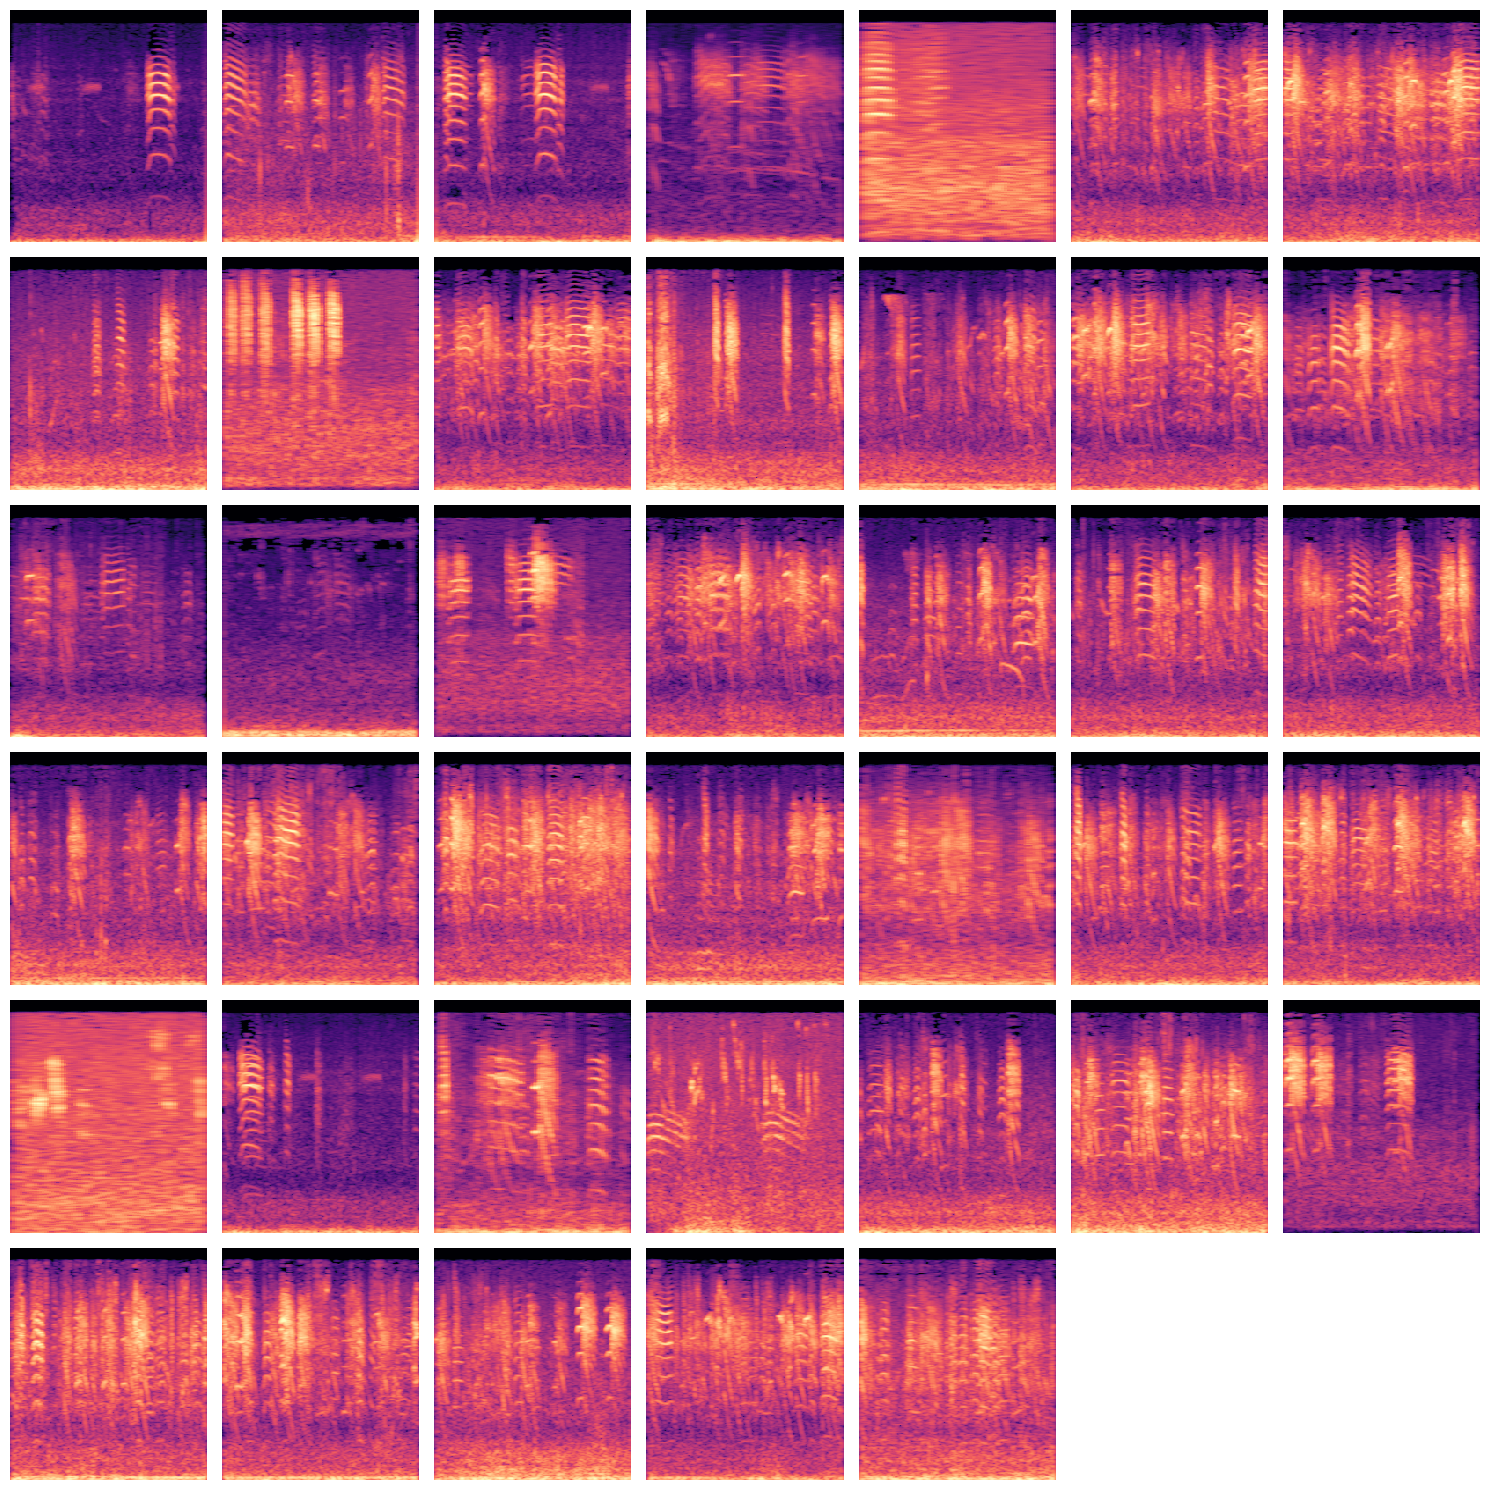

In [8]:
# Process the audio files in the "Audio_Folder" and save the grid to "Cluster_Directory"
plot_mel_spectrograms_grid(root_folder, output_dir)

## Tachybaptus novaehollandiae

In [9]:
root_folder = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species\\Tachybaptus novaehollandiae"
output_dir = r"D:\\Projects\\project-echo-data\\bucket-1-updated\\Otways Species\\MelSpecs\\Tachybaptus novaehollandiae"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

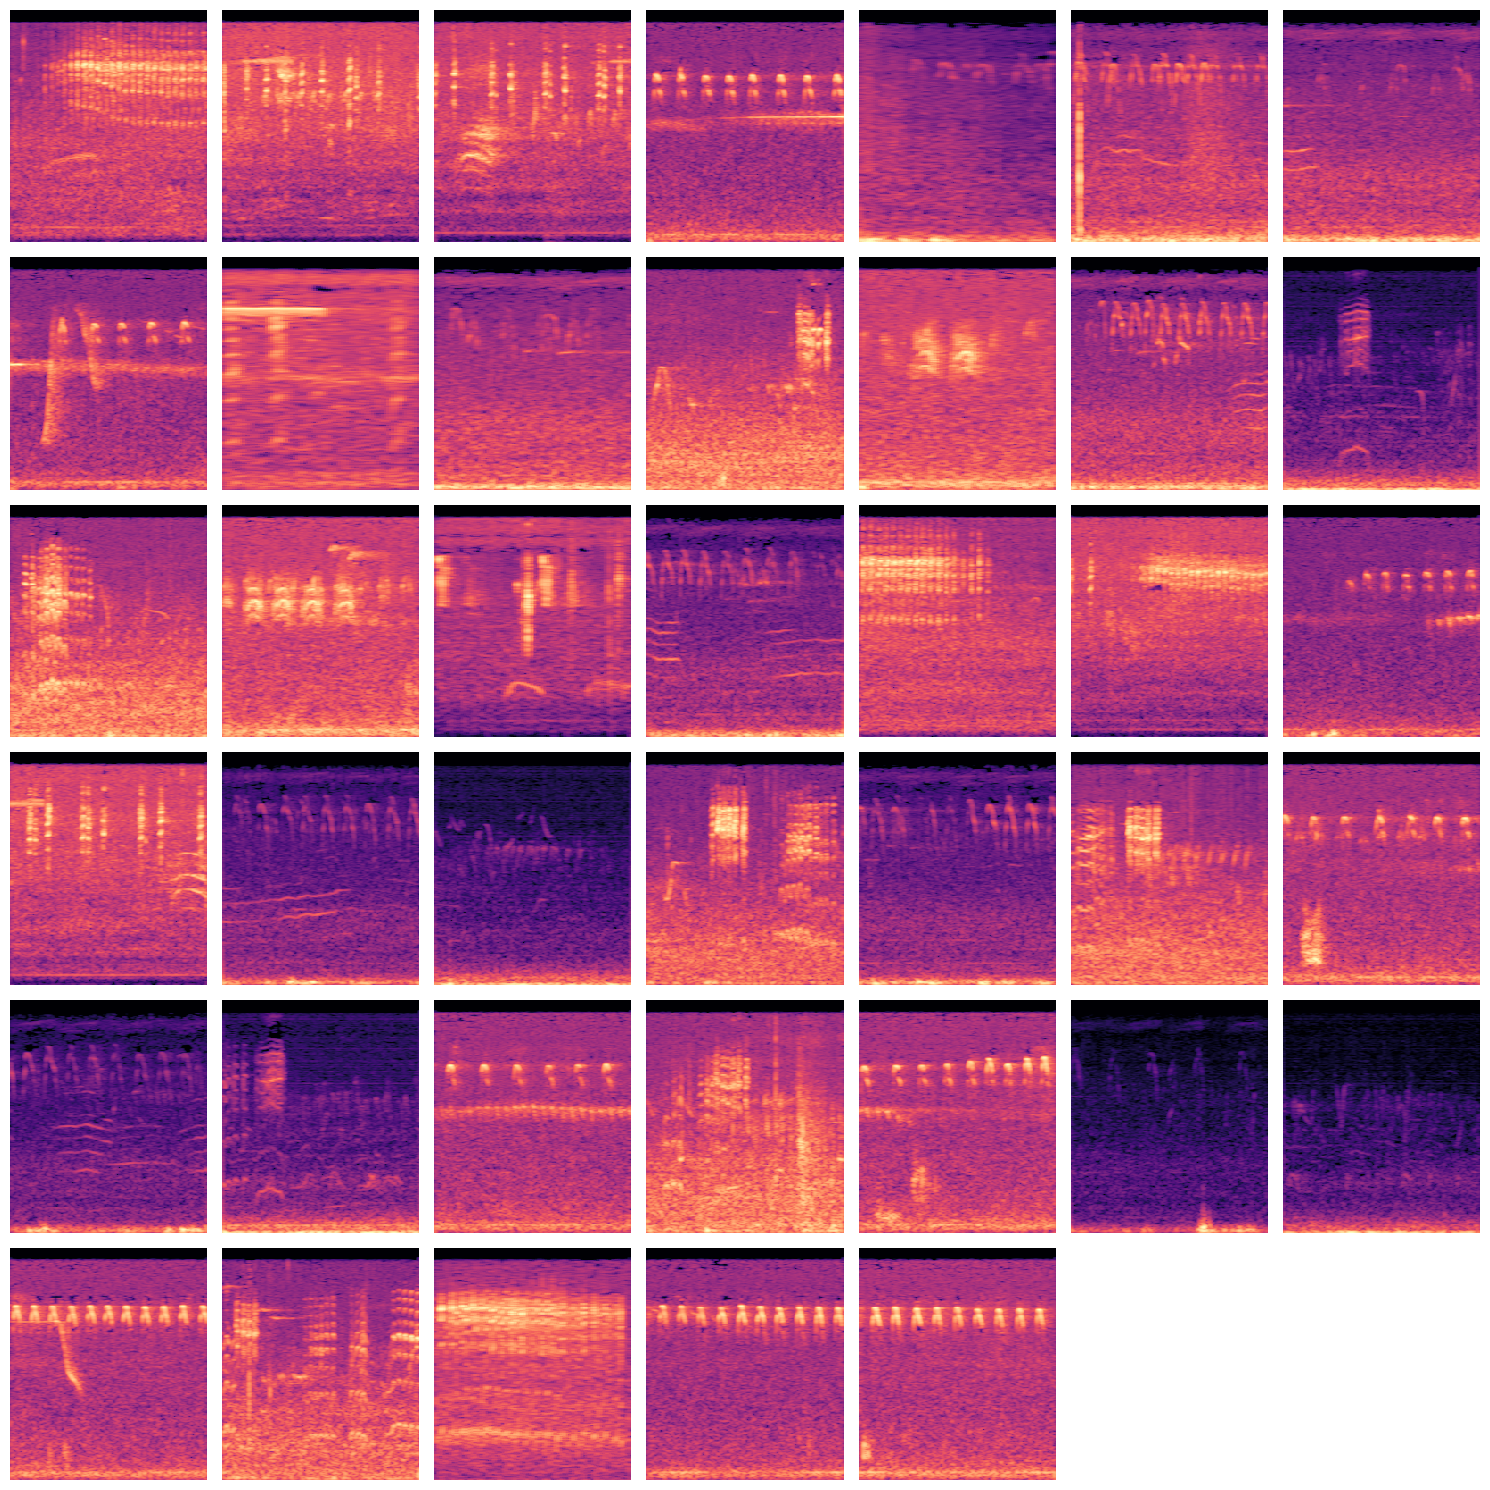

In [10]:
# Process the audio files in the "Audio_Folder" and save the grid to "Cluster_Directory"
plot_mel_spectrograms_grid(root_folder, output_dir)